[Reference](https://towardsdatascience.com/introducing-pycircular-a-python-library-for-circular-data-analysis-bfd696a6a42b)

In [2]:
!pip install pycircular

  Preparing metadata (setup.py) ... done
  Created wheel for pycircular: filename=pycircular-0.1.2-py3-none-any.whl size=18554 sha256=c4b5d2602a317ae28ad194235a6a4482c7435675c24a4c865a18ce1584bc3c54
  Stored in directory: /root/.cache/pip/wheels/a4/c6/ca/d7a694d2782aba7f6d71ca69b6ef4dbbbf426b729da3e6101c
Successfully built pycircular


1    2020-01-01 03:09:57
6    2020-01-01 16:37:52
9    2020-01-01 19:16:12
12   2020-01-01 19:16:58
15   2020-01-01 19:17:48
Name: date, dtype: datetime64[ns]
count                              349
mean     2020-04-03 01:32:31.352435712
min                2020-01-01 03:09:57
25%                2020-02-09 08:44:55
50%                2020-03-27 01:00:01
75%                2020-05-25 00:36:32
max                2020-07-29 22:39:35
Name: date, dtype: object


<Axes: xlabel='date'>

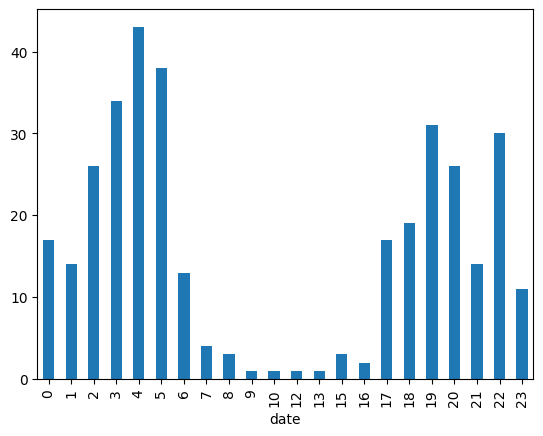

In [5]:
import pandas as pd
import pycircular
import matplotlib.pyplot as plt

df = pycircular.datasets.load_transactions()['data']
df['date']= pd.to_datetime(df['date'])
dates = df.loc[df['user'] == 1, 'date']

print(dates.head())

print(dates.describe(datetime_is_numeric=True))

dates.groupby(dates.dt.hour).count().plot(kind="bar")

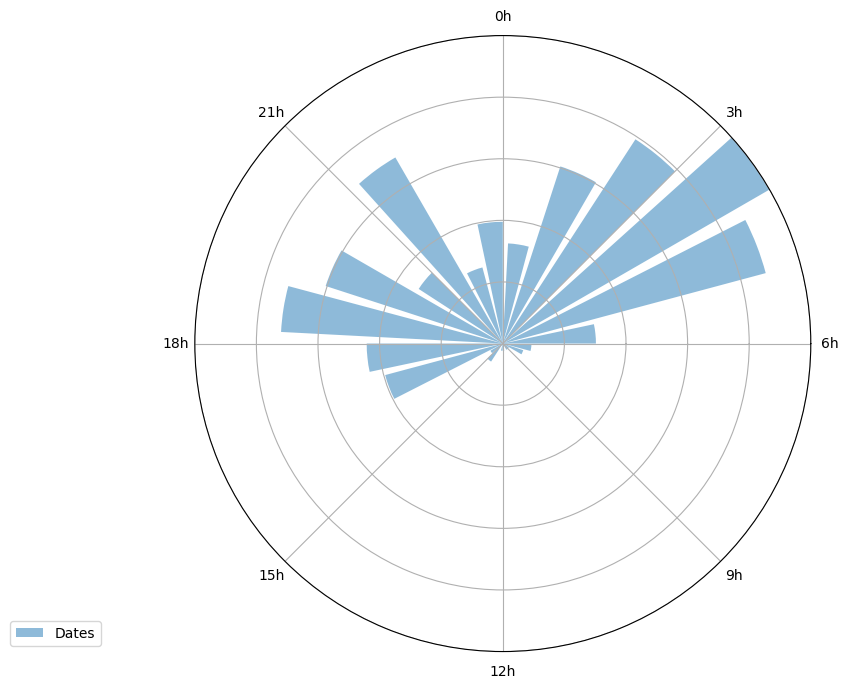

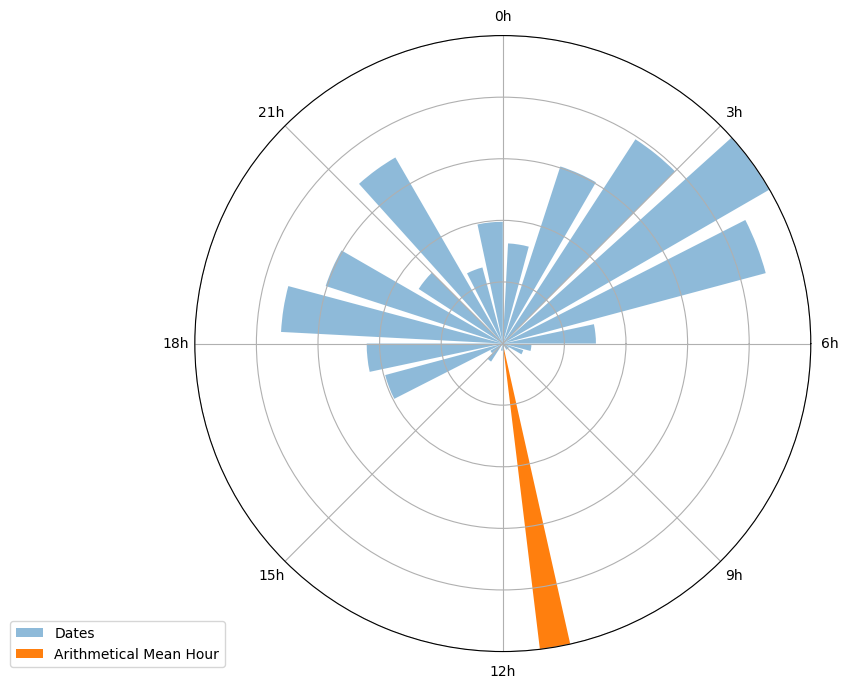

In [6]:
time_segment = 'hour'  # 'hour', 'dayweek', 'daymonth
freq_arr, times = pycircular.utils.freq_time(dates , time_segment=time_segment)
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.legend(bbox_to_anchor=(-0.3, 0.05), loc="upper left", borderaxespad=0)

plt.show()

dates_mean = times.values.mean()
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.bar([dates_mean], [1], width=0.1, label='Arithmetical Mean Hour')
ax1.legend(bbox_to_anchor=(-0.3, 0.05), loc="upper left", borderaxespad=0)

plt.show()

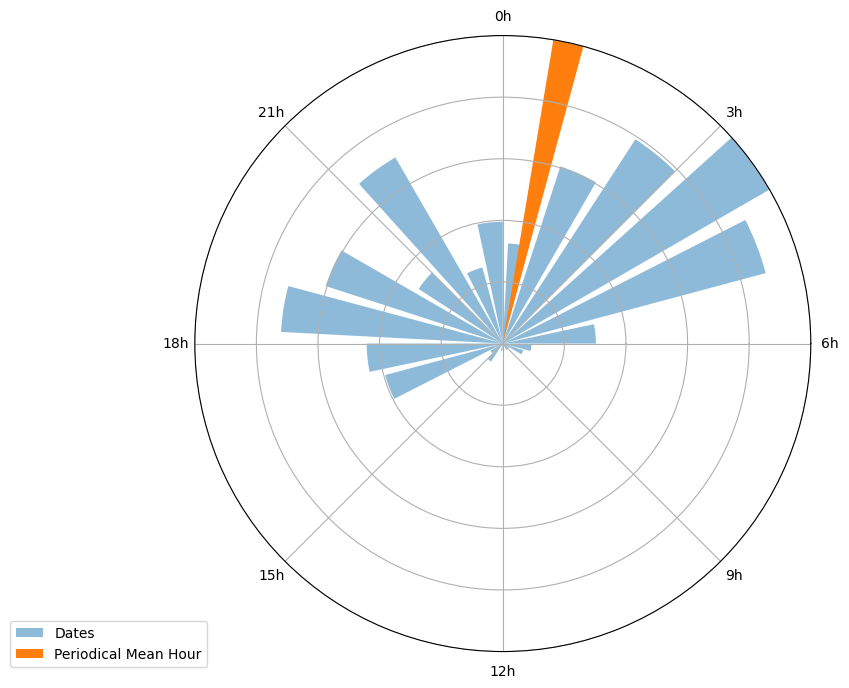

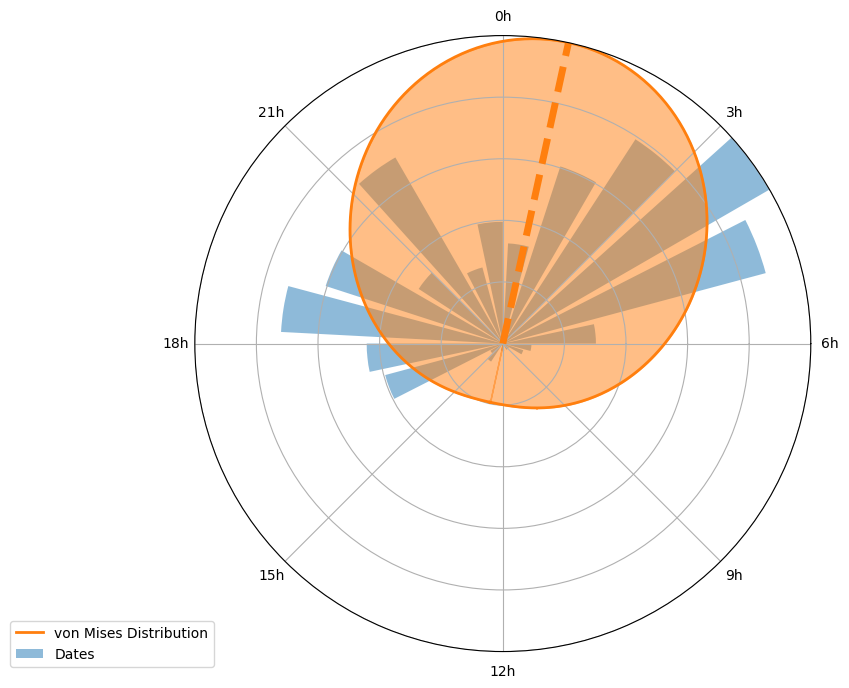

In [7]:
radians = pycircular.utils._date2rad(dates, time_segment='hour')
mean, std = pycircular.stats.periodic_mean_std(radians)

fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment=time_segment)
ax1.bar([mean], [1], width=0.1, label='Periodical Mean Hour')
ax1.legend(bbox_to_anchor=(-0.3, 0.05), loc="upper left", borderaxespad=0)

plt.show()

# Calculate the von Mises distribution
x, p = pycircular.stats.von_mises_distribution(mean, std)

fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:, 0], freq_arr[:, 1], time_segment='hour')

ax1 = pycircular.plots.clock_vonmises_distribution(ax1, mean, x, p)
plt.show()